(150, 4)


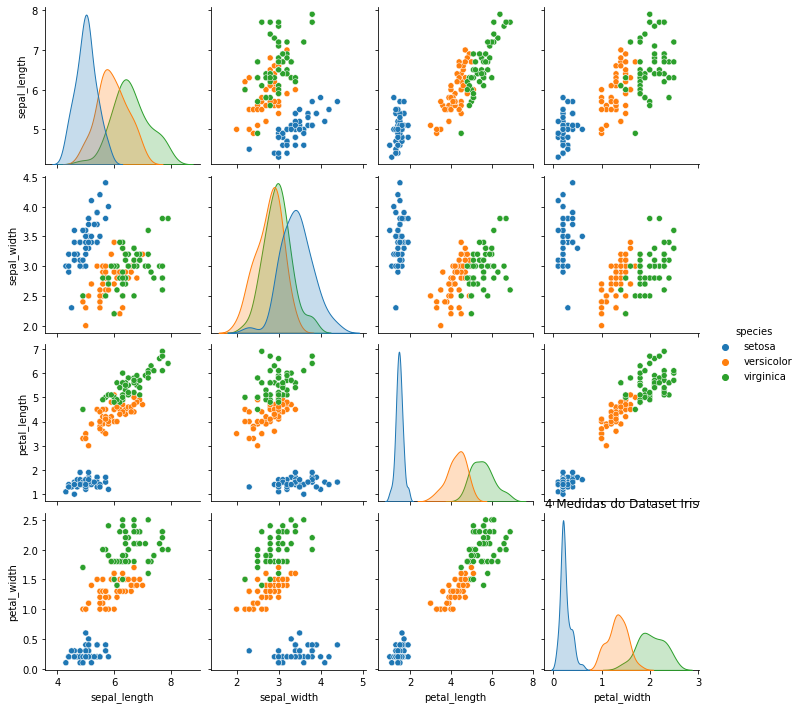

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# iris= pd.read_csv('../iris.cvs')
# iris = datasets.load_iris()
iris = sb.load_dataset('iris')
sb.pairplot(iris, hue = 'species')
plt.title("4 Medidas do Dataset Iris")
# print(iris_data)

#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)

Matriz de covariância K:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]



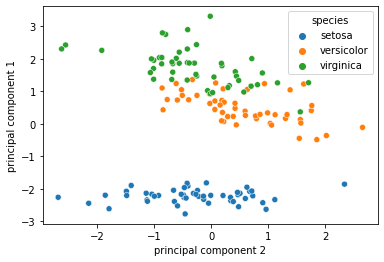

In [6]:
#Normalização dos dados
x = StandardScaler().fit_transform(data)

K = np.cov(x.T)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
# print(principal_comp.shape)
# Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data = pd.concat([Data, iris['species']], axis = 1)

# sb.pairplot(Data, hue = 'species')

plt.show()
Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data_2D, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
sb.scatterplot(x = Data_2D['principal component 2'],y = Data_2D['principal component 1'], hue = Data_2D['species'])
plt.show()

## Exemplo usando a biblioteca:

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
# print(X.shape)
# print(y_true.shape)
# print((X[:, 0]))
kms = KMeans(4)

kms.fit(X)
y_kms = kms.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kms, s=50, cmap='viridis')

centers = kms.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

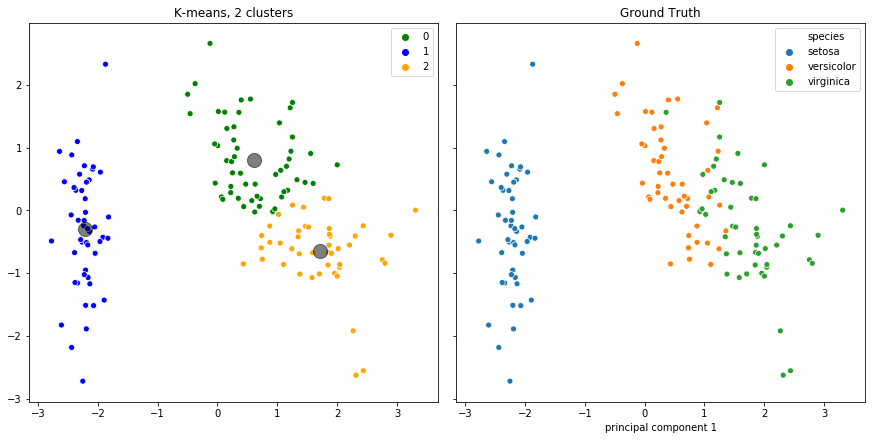

In [9]:
fig, ax = plt.subplots(1, 2,figsize=(6*2,6), sharex=True, sharey=True,constrained_layout=True)

X = Data_2D.iloc[:, 0:2].values
# print(X)
kms3 = KMeans(n_clusters=3)
kms3.fit(X)
cluster = kms3.predict(X)
sb.scatterplot(X[:, 0], X[:, 1], hue=cluster,ax = ax[0], palette= ['green', 'blue', 'orange' ])

centers = kms3.cluster_centers_
# print(cluster.shape)
ax[0].set_title("K-means, 2 clusters")
ax[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
ax[1].set_title("Ground Truth")
sb.scatterplot(Data_2D['principal component 1'],Data_2D['principal component 2'], ax = ax[1], hue = Data_2D['species'])
plt.show()

In [10]:
y_true = np.copy(Data_2D['species'])
y_true[y_true=='versicolor']= 0
y_true[y_true=='setosa']= 1
y_true[y_true=='virginica']= 2
y_true = np.array(y_true, dtype= 'int64')
confusion_matrix(y_true, cluster)

array([[39,  0, 11],
       [ 0, 50,  0],
       [16,  0, 34]])

# K-nn


In [29]:
#implementing

# calculate the Euclidean distance between two vectors
def distance(r1, r2):
    distance  = 0.0
    for e1,e2 in zip(r1,r2):
#         print("%s -  %s"%(e1,e2))
        distance +=((e1-e2)**2)
#     print()
    return np.sqrt(distance)


dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

for row in dataset:
#     print(row[:-1])
    print(distance(dataset[0][:-1], row[:-1]))

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    
    distances = []
    
    for train_row in train:
        dist = distance(test_row, train_row)
        distances.append((train_row, dist))
        
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors


0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial.distance import cdist
from collections import Counter
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class KNN:
    def __init__(self, k = 3):
        self._k = k
        self._neighbors = None
    def fit(self, X, y):
        self._X = X #data
        self._y = y #target
        return self
    def __predict(self, column):
        neighbors = tf.gather_nd(self._y, tf.reshape(column, (-1,1)))
        return Counter(neighbors.numpy()).most_common()[0][0]
    def predict(self, X):
        distances = cdist(self._X, X, 'euclidean')
        arg_sorted_distances = tf.argsort(distances, axis = 0)
        neighbors = arg_sorted_distances[:self._k]
        predictios = tf.map_fn(self.__predict, tf.transpose(neighbors))
        return tf.cast(predictios, 'float32')


digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

k = 3
mnist_knn = KNN(k=k)
mnist_knn.fit(X_train, y_train)
predictions = mnist_knn.predict(X_test)

print(confusion_matrix(y_test, predictions))




NameError: name 'tf' is not defined

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
iris = datasets.load_iris()
def Dist(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

class k_vizinhos:
    def __init__(self, k, trainData, trainLabels):
        self.k = k
        self.trainData, self.trainLabels = trainData, trainLabels
        
    def predict(self, X):
        y_pred = [self.calc(x) for x in X]
        return np.array(y_pred)
    
    
    def calc(self, x):
        # Calculando as distâncias relativas para os novos pontos
        distances = [Dist(x, x_train) for x_train in self.trainData]
        # Obtendo os primeros k vizinhos
        index = np.argsort(distances)[:self.k]
        labels = [self.trainLabels[i] for i in index]  
        # return the most common class label
        most_common = Counter(labels).most_common(1)
        return most_common[0][0]
    
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=666)

Iris_knn = k_vizinhos(3, X_train, y_train)
predictions = Iris_knn.predict(X_test)
print(y_test,"\n", predictions)
print(confusion_matrix(y_test, predictions))

[1 2 1 2 0 1 1 2 1 1 1 0 0 0 2 1 0 2 2 2 1 0 2 0 1 1 0 1 2 2 0 0 1 2 1 1 2
 2 0 1 2 2 1 1 0 0 0 0 1 0 0 2 1 1 1 0 0 2 2 1 2 0 1 1 0 1 0 0 2 2 2 1 1 2
 2] 
 [1 2 1 2 0 1 1 2 1 1 1 0 0 0 2 1 0 2 2 2 1 0 2 0 1 1 0 1 2 2 0 0 1 2 1 1 2
 2 0 2 2 2 1 1 0 0 0 0 1 0 0 2 1 1 1 0 0 2 2 1 2 0 2 1 0 1 0 0 2 2 2 1 1 2
 2]
[[23  0  0]
 [ 0 26  2]
 [ 0  0 24]]


In [17]:
data = datasets.load_digits()
data = data.images.reshape((len(data.images), -1))

X_train, X_test, y_train, y_test = train_test_split(data, data.target, test_size=0.5, shuffle=False)


mnist_knn = k_vizinhos(3,X_train, y_train)
predictions = mnist_knn.predict(X_test)

print(confusion_matrix(y_test, predictions))

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 83  0  1  0  2  2  2]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  2  0  2  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]
